In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

In [2]:
import sweetviz
from pandas_profiling import ProfileReport

In [3]:
filenames = ['devices', 'notifications', 'transactions_1', 'transactions_2', 'transactions_3', 'users']

In [4]:
dataframes = [pd.read_csv('data/' + filename + '.csv') for filename in filenames]
devices_df, notifications_df, transactions_1_df, transactions_2_df, transactions_3_df, users_df = dataframes

In [5]:
#merge transactions into 1 dataframe
transactions_df = pd.concat([transactions_1_df, transactions_2_df, transactions_3_df])

In [6]:
#merge devices_df on users1_df
users1_df = pd.merge(users_df, devices_df, on='user_id')

## EDA & transformations on notifications

In [7]:
notifications_df.sample(5)

,reason,channel,status,user_id,created_date
76877,SILVER_ENGAGEMENT_FEES_SAVED,PUSH,SENT,user_12005,2019-01-23 09:18:59.566411
42817,PROMO_CARD_ORDER,EMAIL,SENT,user_10522,2018-07-18 18:45:34.714360
18050,REENGAGEMENT_ACTIVE_FUNDS,PUSH,SENT,user_9699,2018-12-05 06:54:06.029553
44495,PROMO,PUSH,SENT,user_10129,2019-01-22 07:01:42.207781
83532,NO_INITIAL_CARD_ORDER,EMAIL,SENT,user_10218,2018-08-08 04:58:22.193805


In [8]:
print(notifications_df['status'].unique())
print(notifications_df['channel'].unique())
print(notifications_df['reason'].unique())

['SENT' 'FAILED']
['PUSH' 'SMS' 'EMAIL']
['REENGAGEMENT_ACTIVE_FUNDS' 'BLUE_TUESDAY' 'NO_INITIAL_CARD_USE'
 'ENGAGEMENT_SPLIT_BILL_RESTAURANT' 'METAL_RESERVE_PLAN'
 'ONBOARDING_TIPS_ACTIVATED_USERS' 'MADE_MONEY_REQUEST_NOT_SPLIT_BILL'
 'SILVER_ENGAGEMENT_INACTIVE_CARD' 'NO_INITIAL_CARD_ORDER'
 'SILVER_ENGAGEMENT_FEES_SAVED' 'PROMO' 'WELCOME_BACK' 'PROMO_CARD_ORDER'
 'LOST_CARD_ORDER' 'BLACK_FRIDAY' 'INVEST_IN_GOLD' 'JOINING_ANNIVERSARY']


In [9]:
profile = ProfileReport(notifications_df, minimal=True)
profile.to_widgets()

In [10]:
#keep only sent notifications
notifications1_df = notifications_df[notifications_df['status'] == 'SENT'].copy()

In [11]:
#pd.options.mode.chained_assignment = None

In [12]:
notifications1_df.drop(['status','created_date'],axis=1, inplace=True)

In [13]:
notifications1_df = pd.get_dummies(notifications1_df, columns=['reason','channel'])

In [14]:
notifications1_df = notifications1_df.groupby('user_id').sum()

In [15]:
notifications1_df

,reason_BLACK_FRIDAY,reason_BLUE_TUESDAY,reason_ENGAGEMENT_SPLIT_BILL_RESTAURANT,reason_INVEST_IN_GOLD,reason_JOINING_ANNIVERSARY,reason_LOST_CARD_ORDER,reason_MADE_MONEY_REQUEST_NOT_SPLIT_BILL,reason_METAL_RESERVE_PLAN,reason_NO_INITIAL_CARD_ORDER,reason_NO_INITIAL_CARD_USE,reason_ONBOARDING_TIPS_ACTIVATED_USERS,reason_PROMO,reason_PROMO_CARD_ORDER,reason_REENGAGEMENT_ACTIVE_FUNDS,reason_SILVER_ENGAGEMENT_FEES_SAVED,reason_SILVER_ENGAGEMENT_INACTIVE_CARD,reason_WELCOME_BACK,channel_EMAIL,channel_PUSH,channel_SMS
user_id,,,,,,,,,,,,,,,,,,,,
user_0,1,0,0,1,0,0,0,0,0,1,4,0,0,1,0,0,0,6,2,0
user_1,0,0,1,0,1,0,0,0,1,3,0,1,0,3,0,0,0,5,5,0
user_10,0,0,0,1,1,1,0,0,3,0,0,2,0,0,0,0,0,5,3,0
user_100,0,0,0,1,0,1,0,0,0,1,0,1,0,1,0,0,0,2,3,0
user_1000,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
user_9995,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
user_9996,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
user_9997,0,0,1,0,0,0,0,0,0,0,0,2,0,4,0,0,0,2,5,0


In [16]:
import numpy as np
corr_abs = notifications1_df.corr().abs()

sol = (corr_abs.where(np.triu(np.ones(corr_abs.shape), k=1).astype(np.bool))
                 .stack()
                 .sort_values(ascending=False))
sol

reason_METAL_RESERVE_PLAN               channel_SMS                                 0.950236
reason_REENGAGEMENT_ACTIVE_FUNDS        channel_PUSH                                0.888153
reason_NO_INITIAL_CARD_USE              channel_EMAIL                               0.450579
reason_LOST_CARD_ORDER                  reason_NO_INITIAL_CARD_USE                  0.421047
reason_ONBOARDING_TIPS_ACTIVATED_USERS  channel_EMAIL                               0.366999
                                                                                      ...   
reason_METAL_RESERVE_PLAN               reason_REENGAGEMENT_ACTIVE_FUNDS            0.001112
reason_INVEST_IN_GOLD                   reason_ONBOARDING_TIPS_ACTIVATED_USERS      0.001082
reason_LOST_CARD_ORDER                  reason_MADE_MONEY_REQUEST_NOT_SPLIT_BILL    0.000673
reason_BLUE_TUESDAY                     reason_INVEST_IN_GOLD                       0.000537
reason_NO_INITIAL_CARD_ORDER            reason_SILVER_ENGAGEMENT_INACT

## EDA & transformations on users

In [17]:
users1_df.head()

,user_id,birth_year,country,city,created_date,user_settings_crypto_unlocked,plan,attributes_notifications_marketing_push,attributes_notifications_marketing_email,num_contacts,num_referrals,num_successful_referrals,brand
0,user_0,1992,ES,Madrid,2018-09-10 18:46:42.843855,0,STANDARD,1.0,1.0,3,0,0,Apple
1,user_1,1985,LT,Klaipeda,2018-01-11 18:53:10.531146,1,STANDARD,NaN,NaN,75,0,0,Apple
2,user_2,1996,IE,Carrickmacross,2018-11-29 17:29:16.879324,0,STANDARD,NaN,NaN,71,0,0,Apple
3,user_3,1981,IE,Dublin,2018-02-17 11:58:08.319664,0,STANDARD,NaN,NaN,219,0,0,Apple
4,user_4,1992,GB,London,2018-01-08 18:40:21.097856,0,STANDARD,NaN,NaN,0,0,0,Apple


In [18]:
users1_df.isnull().sum()

user_id                                        0
birth_year                                     0
country                                        0
city                                           0
created_date                                   0
user_settings_crypto_unlocked                  0
plan                                           0
attributes_notifications_marketing_push     5260
attributes_notifications_marketing_email    5260
num_contacts                                   0
num_referrals                                  0
num_successful_referrals                       0
brand                                          0
dtype: int64

In [19]:
print(users1_df.num_referrals.nunique())
print(users1_df.num_successful_referrals.nunique())

1
1


In [20]:
#birth_year to age
users1_df['age'] = 2020 - users1_df['birth_year']
users1_df.drop(['birth_year'],axis=1, inplace=True)

In [21]:
profile = ProfileReport(users1_df, minimal=True)
profile.to_widgets()

In [22]:
users1_df.drop(['num_referrals','num_successful_referrals','city','created_date'],axis=1, inplace=True)

In [23]:
users1_df

,user_id,country,user_settings_crypto_unlocked,plan,attributes_notifications_marketing_push,attributes_notifications_marketing_email,num_contacts,brand,age
0,user_0,ES,0,STANDARD,1.0,1.0,3,Apple,28
1,user_1,LT,1,STANDARD,NaN,NaN,75,Apple,35
2,user_2,IE,0,STANDARD,NaN,NaN,71,Apple,24
3,user_3,IE,0,STANDARD,NaN,NaN,219,Apple,39
4,user_4,GB,0,STANDARD,NaN,NaN,0,Apple,28
...,...,...,...,...,...,...,...,...,...
15539,user_15539,PL,0,STANDARD,1.0,1.0,0,Android,23
15540,user_15540,PL,0,STANDARD,NaN,NaN,0,Apple,35
15541,user_15541,GB,0,STANDARD,1.0,1.0,16,Android,42
15542,user_15542,IE,0,GOLD,1.0,1.0,44,Apple,43


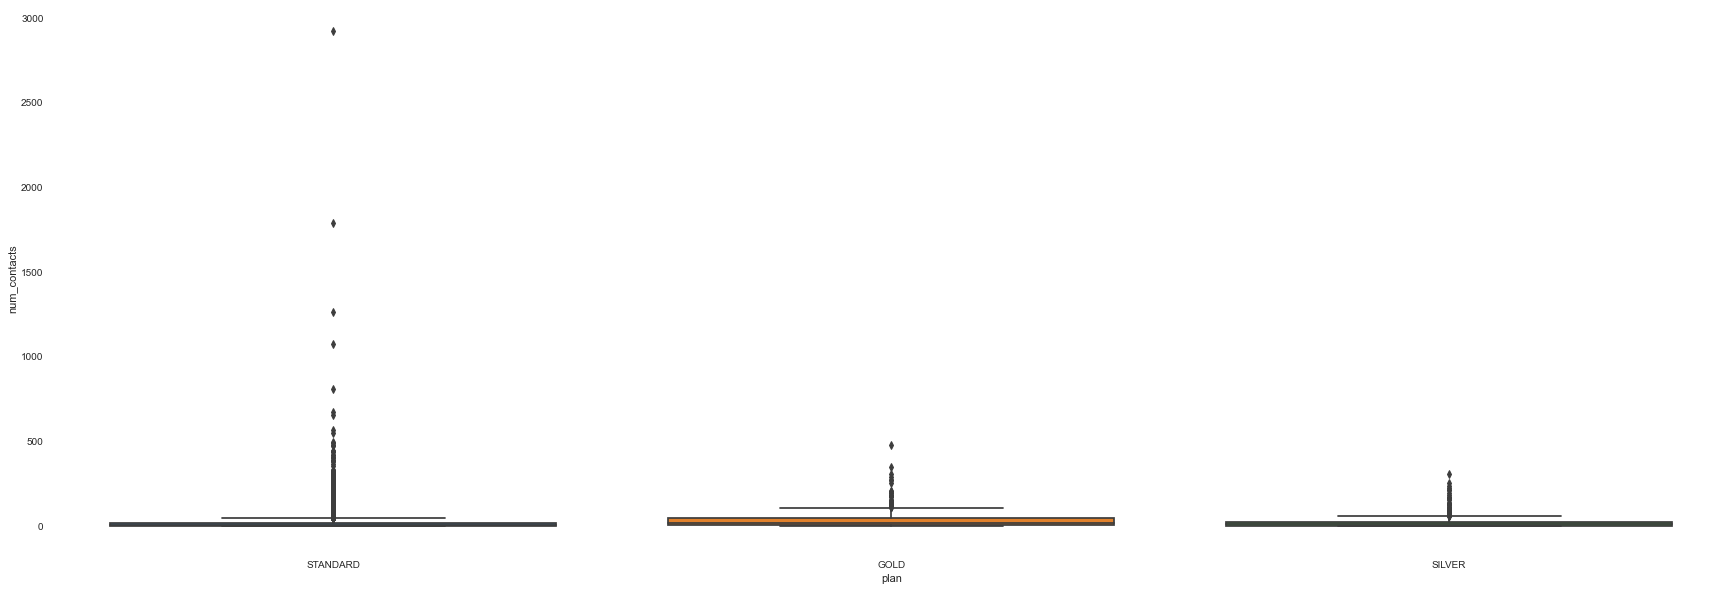

In [24]:
#check and remove outliers
plt.figure(figsize=(30, 10))
chart = sns.boxplot(x='plan',y='num_contacts', data=users1_df)

In [25]:
users1_df[users1_df['num_contacts']>1500]

,user_id,country,user_settings_crypto_unlocked,plan,attributes_notifications_marketing_push,attributes_notifications_marketing_email,num_contacts,brand,age
4756,user_4756,LT,0,STANDARD,1.0,1.0,2918,Apple,32
4854,user_4854,MT,0,STANDARD,1.0,1.0,1785,Apple,37


In [26]:
users1_df=users1_df[users1_df['num_contacts']<1500]

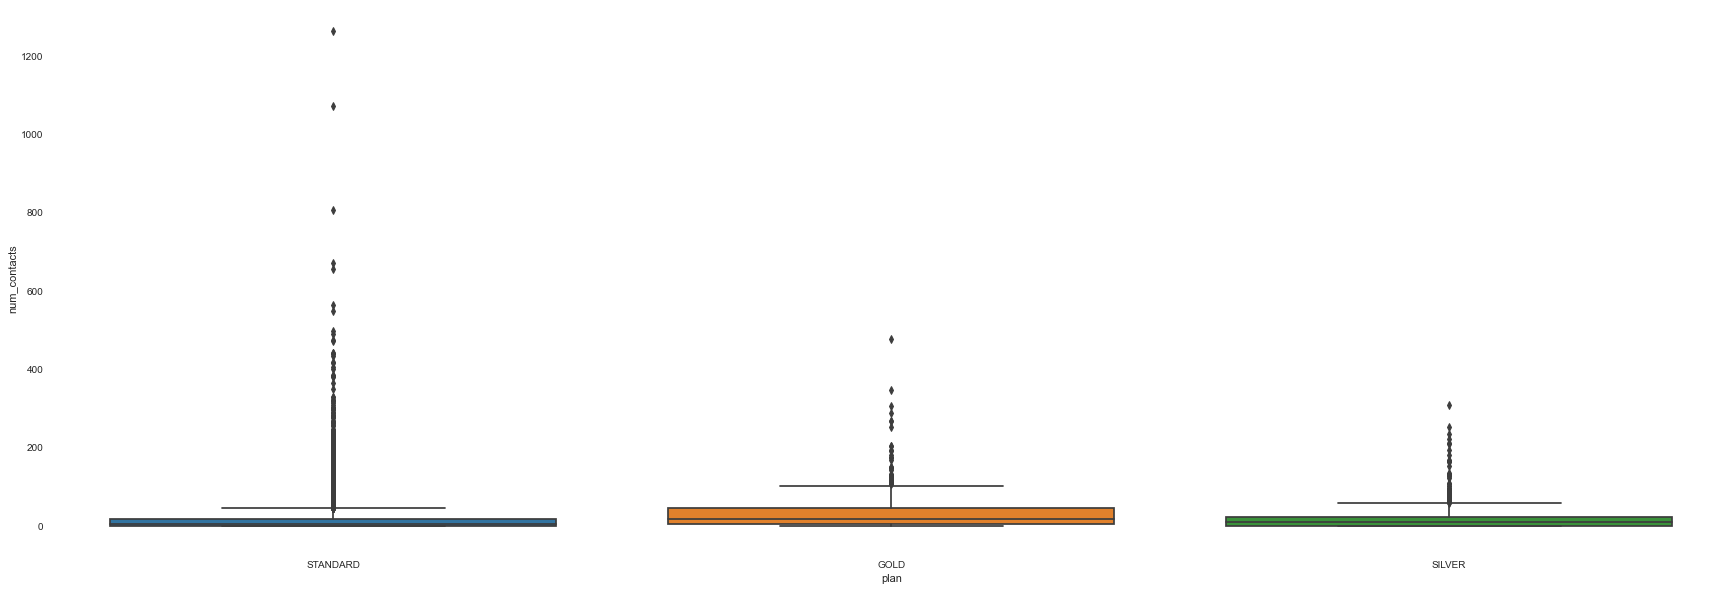

In [27]:
plt.figure(figsize=(30, 10))
chart = sns.boxplot(x='plan',y='num_contacts', data=users1_df)

## EDA & transformations on transactions

In [28]:
transactions_df.sample(5)

,transaction_id,transactions_type,transactions_currency,amount_usd,transactions_state,ea_cardholderpresence,ea_merchant_mcc,ea_merchant_city,ea_merchant_country,direction,user_id,created_date
392645,transaction_1192645,CASHBACK,GBP,0.21,COMPLETED,NaN,NaN,NaN,NaN,INBOUND,user_11302,2019-04-29 11:52:00.909053
272407,transaction_1772407,TOPUP,GBP,30.00,COMPLETED,NaN,NaN,NaN,NaN,INBOUND,user_7935,2019-04-12 14:44:30.605883
715572,transaction_715572,TOPUP,GBP,50.00,COMPLETED,NaN,NaN,NaN,NaN,INBOUND,user_2025,2018-09-22 18:15:30.016329
10930,transaction_810930,TRANSFER,EUR,4.65,COMPLETED,NaN,NaN,NaN,NaN,OUTBOUND,user_3370,2019-04-22 21:56:43.920909
472553,transaction_1972553,CARD_PAYMENT,EUR,2.34,COMPLETED,FALSE,5712.0,Dublin,IRL,OUTBOUND,user_874,2019-02-10 10:39:38.248618


In [29]:
profile = ProfileReport(transactions_df, minimal=True)
profile.to_widgets()

In [30]:
transactions_df.isnull().sum()

transaction_id                0
transactions_type             0
transactions_currency         0
amount_usd                    0
transactions_state            0
ea_cardholderpresence    933206
ea_merchant_mcc          923975
ea_merchant_city         924080
ea_merchant_country      924239
direction                     0
user_id                       0
created_date                  0
dtype: int64

In [31]:
transactions_df.transactions_type.value_counts()

CARD_PAYMENT    1173661
TRANSFER         402126
TOPUP            309740
EXCHANGE         124800
ATM               74181
CASHBACK          65063
FEE               18786
CARD_REFUND        9209
TAX                2267
REFUND             1193
Name: transactions_type, dtype: int64

In [32]:
transactions_df.transactions_state.value_counts()

COMPLETED    1916387
DECLINED      124226
REVERTED       89330
FAILED         32566
PENDING        17153
CANCELLED       1364
Name: transactions_state, dtype: int64

In [33]:
transactions_df.direction.value_counts()

OUTBOUND    1759079
INBOUND      421947
Name: direction, dtype: int64

In [34]:
#keep only 'COMPLETED' transactions
completed_transactions_df = transactions_df[transactions_df['transactions_state'] == 'COMPLETED']

In [35]:
completed_transactions_df.transactions_type.value_counts()

CARD_PAYMENT    999418
TRANSFER        396323
TOPUP           242621
EXCHANGE        124800
ATM              61518
CASHBACK         60278
FEE              18786
CARD_REFUND       9208
TAX               2242
REFUND            1193
Name: transactions_type, dtype: int64

In [36]:
# drop 'EXCHANGE' transactions
completed_transactions_df=completed_transactions_df[completed_transactions_df['transactions_type']!='EXCHANGE']

In [37]:
# drop unneeded columns
completed_transactions_df.drop(['transaction_id','transactions_currency','transactions_state','ea_cardholderpresence','ea_merchant_mcc','ea_merchant_city','ea_merchant_country','created_date'],axis=1, inplace=True)

In [38]:
completed_transactions_df

,transactions_type,amount_usd,direction,user_id
0,TRANSFER,4.55,OUTBOUND,user_4368
1,CARD_PAYMENT,15.50,OUTBOUND,user_2355
2,CARD_PAYMENT,43.40,OUTBOUND,user_2355
3,TRANSFER,10043.01,OUTBOUND,user_2355
4,CARD_PAYMENT,43.81,OUTBOUND,user_14318
...,...,...,...,...
681020,TRANSFER,46.81,INBOUND,user_1011
681022,TRANSFER,1.70,OUTBOUND,user_1011
681023,TRANSFER,4.26,OUTBOUND,user_3170
681024,TRANSFER,1.70,OUTBOUND,user_8195


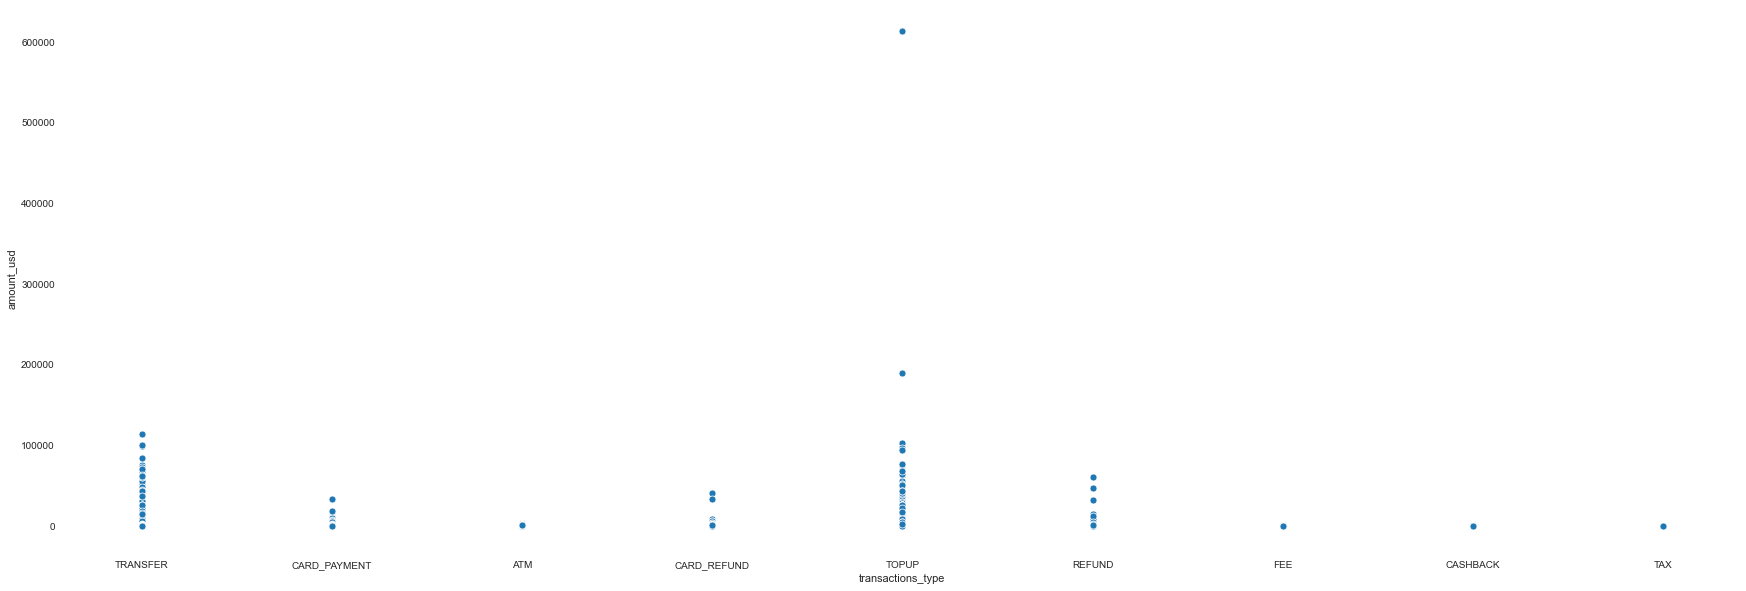

In [39]:
#check and remove outliers
plt.figure(figsize=(30, 10))
chart = sns.scatterplot(x='transactions_type',y='amount_usd', data=completed_transactions_df)

In [40]:
completed_transactions_df[completed_transactions_df['amount_usd']>150000]

,transactions_type,amount_usd,direction,user_id
589913,TOPUP,188665.72,INBOUND,user_2210
565359,TOPUP,612766.46,INBOUND,user_936


In [41]:
completed_transactions_df=completed_transactions_df[completed_transactions_df['amount_usd']<150000]

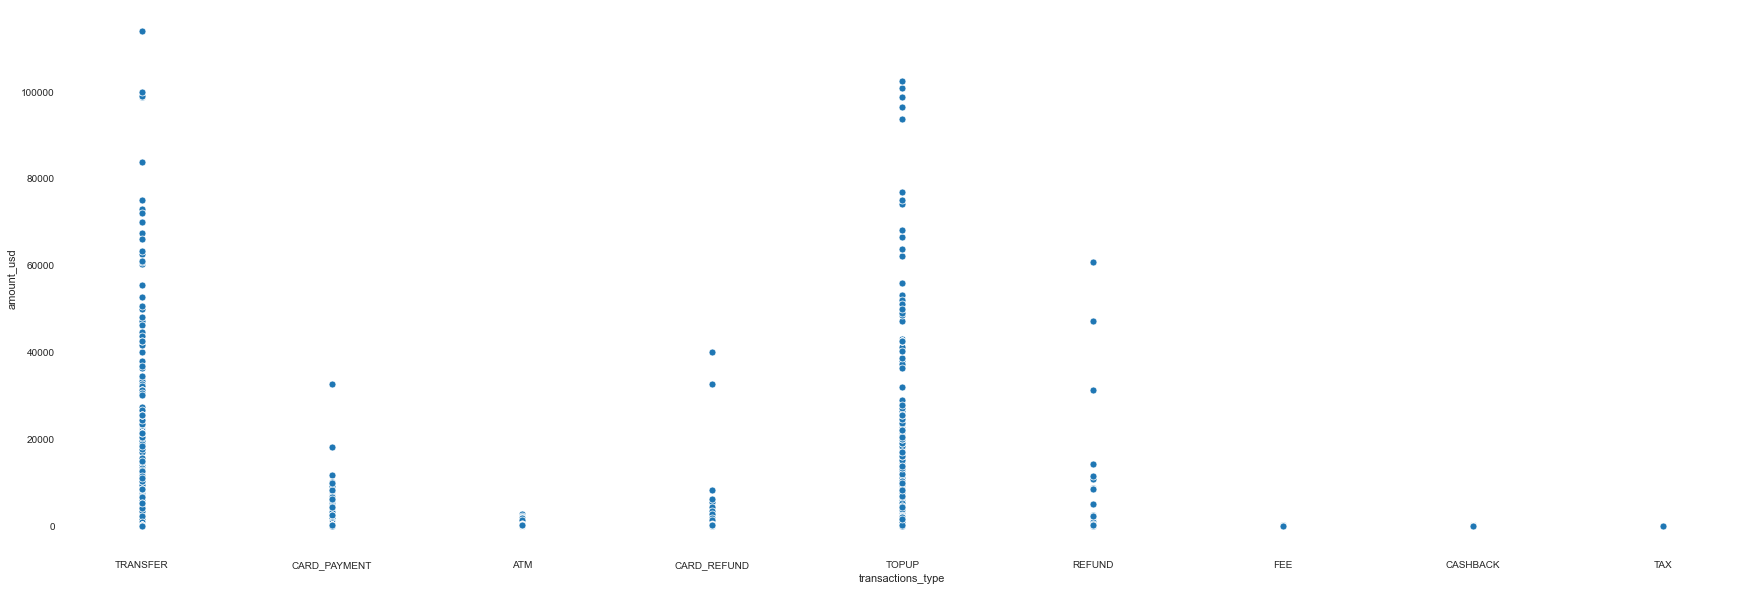

In [42]:
plt.figure(figsize=(30, 10))
chart = sns.scatterplot(x='transactions_type',y='amount_usd', data=completed_transactions_df)

In [43]:
# create a total usd feature for each user and subtract the refunds
transactions_tot = completed_transactions_df.groupby('user_id')[['amount_usd']].sum()

In [44]:
transactions_tot

,amount_usd
user_id,
user_0,6741.88
user_1,12955.54
user_10,5437.70
user_100,4230.10
user_1000,843.12
...,...
user_9995,187.16
user_9996,1181.76
user_9997,6585.30


In [45]:
refunds_df = completed_transactions_df[completed_transactions_df['transactions_type']=='REFUND'].groupby('user_id')[['amount_usd']].sum()
refunds_df = refunds_df.rename(columns={'amount_usd':'refunds'})

In [46]:
card_refunds_df = completed_transactions_df[completed_transactions_df['transactions_type']=='CARD_REFUND'].groupby('user_id')[['amount_usd']].sum()
card_refunds_df = card_refunds_df.rename(columns={'amount_usd':'card_refunds'})

In [47]:
print(card_refunds_df)
print(refunds_df)

            card_refunds
user_id                 
user_0             13.00
user_10           485.96
user_10008        118.22
user_10010        118.97
user_10027         29.94
...                  ...
user_9971           2.00
user_9979          30.42
user_9981           0.99
user_9989          14.47
user_9997          20.00

[3379 rows x 1 columns]
            refunds
user_id            
user_10048     5.10
user_10054    11.06
user_10065     3.38
user_10097     5.00
user_10103     5.10
...             ...
user_994       4.25
user_9942      5.37
user_9943     30.00
user_9948     10.20
user_9979      1.70

[859 rows x 1 columns]


In [48]:
transactions_tot = transactions_tot.merge(refunds_df, right_index=True, left_index=True, how='outer')
transactions_tot = transactions_tot.merge(card_refunds_df, right_index=True, left_index=True, how='outer')

In [49]:
transactions_tot

,amount_usd,refunds,card_refunds
user_id,,,
user_0,6741.88,NaN,13.00
user_1,12955.54,NaN,NaN
user_10,5437.70,NaN,485.96
user_100,4230.10,NaN,NaN
user_1000,843.12,NaN,NaN
...,...,...,...
user_9995,187.16,NaN,NaN
user_9996,1181.76,NaN,NaN
user_9997,6585.30,NaN,20.00


In [50]:
transactions_tot.isnull().sum()

amount_usd          0
refunds         13957
card_refunds    11437
dtype: int64

In [51]:
transactions_tot.fillna(0, inplace = True)

In [52]:
transactions_tot['usd_tot'] =transactions_tot['amount_usd']-transactions_tot['refunds']-transactions_tot['card_refunds']

In [53]:
transactions_tot

,amount_usd,refunds,card_refunds,usd_tot
user_id,,,,
user_0,6741.88,0.0,13.00,6728.88
user_1,12955.54,0.0,0.00,12955.54
user_10,5437.70,0.0,485.96,4951.74
user_100,4230.10,0.0,0.00,4230.10
user_1000,843.12,0.0,0.00,843.12
...,...,...,...,...
user_9995,187.16,0.0,0.00,187.16
user_9996,1181.76,0.0,0.00,1181.76
user_9997,6585.30,0.0,20.00,6565.30


In [54]:
#create a number of transactions feature for each user
num_transactions = completed_transactions_df.groupby('user_id')[['amount_usd']].count()

In [55]:
num_transactions.rename({'amount_usd': 'num_transactions'}, axis=1, inplace=True)
num_transactions

,num_transactions
user_id,
user_0,515
user_1,133
user_10,120
user_100,55
user_1000,43
...,...
user_9995,3
user_9996,26
user_9997,108


In [56]:
completed_transactions_df

,transactions_type,amount_usd,direction,user_id
0,TRANSFER,4.55,OUTBOUND,user_4368
1,CARD_PAYMENT,15.50,OUTBOUND,user_2355
2,CARD_PAYMENT,43.40,OUTBOUND,user_2355
3,TRANSFER,10043.01,OUTBOUND,user_2355
4,CARD_PAYMENT,43.81,OUTBOUND,user_14318
...,...,...,...,...
681020,TRANSFER,46.81,INBOUND,user_1011
681022,TRANSFER,1.70,OUTBOUND,user_1011
681023,TRANSFER,4.26,OUTBOUND,user_3170
681024,TRANSFER,1.70,OUTBOUND,user_8195


In [57]:
transactions1_df = completed_transactions_df[['transactions_type','direction','user_id']]

In [58]:
transactions1_df

,transactions_type,direction,user_id
0,TRANSFER,OUTBOUND,user_4368
1,CARD_PAYMENT,OUTBOUND,user_2355
2,CARD_PAYMENT,OUTBOUND,user_2355
3,TRANSFER,OUTBOUND,user_2355
4,CARD_PAYMENT,OUTBOUND,user_14318
...,...,...,...
681020,TRANSFER,INBOUND,user_1011
681022,TRANSFER,OUTBOUND,user_1011
681023,TRANSFER,OUTBOUND,user_3170
681024,TRANSFER,OUTBOUND,user_8195


In [59]:
transactions1_df = pd.get_dummies(transactions1_df, columns=['transactions_type','direction'])
transactions1_df = transactions1_df.groupby('user_id').sum()

In [60]:
transactions1_df

,transactions_type_ATM,transactions_type_CARD_PAYMENT,transactions_type_CARD_REFUND,transactions_type_CASHBACK,transactions_type_FEE,transactions_type_REFUND,transactions_type_TAX,transactions_type_TOPUP,transactions_type_TRANSFER,direction_INBOUND,direction_OUTBOUND
user_id,,,,,,,,,,,
user_0,0.0,333.0,1.0,0.0,0.0,0.0,0.0,158.0,23.0,163.0,352.0
user_1,4.0,78.0,0.0,0.0,0.0,0.0,0.0,24.0,27.0,27.0,106.0
user_10,3.0,42.0,9.0,0.0,0.0,0.0,0.0,43.0,23.0,52.0,68.0
user_100,6.0,38.0,0.0,0.0,0.0,0.0,0.0,11.0,0.0,11.0,44.0
user_1000,1.0,16.0,0.0,16.0,2.0,0.0,0.0,7.0,1.0,23.0,20.0
...,...,...,...,...,...,...,...,...,...,...,...
user_9995,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,2.0
user_9996,1.0,20.0,0.0,0.0,1.0,0.0,0.0,4.0,0.0,4.0,22.0
user_9997,3.0,49.0,1.0,0.0,1.0,0.0,0.0,30.0,24.0,33.0,75.0


In [61]:
import numpy as np
corr_abs = transactions1_df.corr().abs()

sol = (corr_abs.where(np.triu(np.ones(corr_abs.shape), k=1).astype(np.bool))
                 .stack()
                 .sort_values(ascending=False))
sol

transactions_type_CARD_PAYMENT  direction_OUTBOUND                0.932972
transactions_type_CASHBACK      direction_INBOUND                 0.827732
transactions_type_TRANSFER      direction_OUTBOUND                0.816711
transactions_type_TOPUP         direction_INBOUND                 0.698997
                                direction_OUTBOUND                0.653952
transactions_type_CARD_PAYMENT  transactions_type_TOPUP           0.646987
direction_INBOUND               direction_OUTBOUND                0.644178
transactions_type_CARD_PAYMENT  direction_INBOUND                 0.638528
                                transactions_type_TRANSFER        0.563167
transactions_type_ATM           direction_OUTBOUND                0.488737
transactions_type_TRANSFER      direction_INBOUND                 0.473275
transactions_type_TOPUP         transactions_type_TRANSFER        0.464321
transactions_type_ATM           transactions_type_TOPUP           0.456835
                         

## Create the final dataframe

In [62]:
#merge total amount usd on users1_df
users2_df = pd.merge(users1_df, transactions_tot['usd_tot'], on='user_id')

In [63]:
users2_df = pd.merge(users2_df, num_transactions, on='user_id')


In [64]:
users2_df 

,user_id,country,user_settings_crypto_unlocked,plan,attributes_notifications_marketing_push,attributes_notifications_marketing_email,num_contacts,brand,age,usd_tot,num_transactions
0,user_0,ES,0,STANDARD,1.0,1.0,3,Apple,28,6728.88,515
1,user_1,LT,1,STANDARD,NaN,NaN,75,Apple,35,12955.54,133
2,user_2,IE,0,STANDARD,NaN,NaN,71,Apple,24,2723.90,268
3,user_3,IE,0,STANDARD,NaN,NaN,219,Apple,39,6999.29,140
4,user_4,GB,0,STANDARD,NaN,NaN,0,Apple,28,788.27,46
...,...,...,...,...,...,...,...,...,...,...,...
14809,user_15539,PL,0,STANDARD,1.0,1.0,0,Android,23,3349.90,78
14810,user_15540,PL,0,STANDARD,NaN,NaN,0,Apple,35,96.28,10
14811,user_15541,GB,0,STANDARD,1.0,1.0,16,Android,42,17595.83,1057
14812,user_15542,IE,0,GOLD,1.0,1.0,44,Apple,43,408.72,23


In [65]:
country_df = users2_df.groupby('country').usd_tot.sum()
country_df = pd.merge(country_df , users2_df.groupby('country').user_id.count().reset_index(), on='country')

In [66]:
country_df.rename({'user_id': 'tot_users'}, axis=1, inplace=True)
country_df

,country,usd_tot,tot_users
0,AT,314652.35,64
1,AU,66.61,3
2,BE,408137.28,99
3,BG,188139.47,67
4,CH,3694553.28,336
5,CY,1013843.83,141
6,CZ,1292294.76,273
7,DE,2729213.74,324
8,DK,499452.41,72
9,EE,100481.11,26


In [67]:
import numpy as np
corr_abs = country_df.corr().abs()

sol = (corr_abs.where(np.triu(np.ones(corr_abs.shape), k=1).astype(np.bool))
                 .stack()
                 .sort_values(ascending=False))
sol

usd_tot  tot_users    0.98059
dtype: float64

In [68]:
users2_df.drop(['country'],axis=1, inplace=True)

In [69]:
users2_df.brand.value_counts()

Android    7404
Apple      7378
Unknown      32
Name: brand, dtype: int64

In [70]:
#remove Unknown brand rows
users2_df = users2_df[users2_df['brand']!='Unknown']

In [71]:
#users plan split depending on attributes_notifications
from IPython.display import display_html
def display_side_by_side(*args):
    html_str=''
    for df in args:
        html_str+=df.to_html()
    display_html(html_str.replace('table','table style="display:inline"'),raw=True)

df1 = pd.crosstab(index=users2_df['plan'], columns=users2_df['attributes_notifications_marketing_push'])
df2 = pd.crosstab(index=users2_df['plan'], columns=users2_df['attributes_notifications_marketing_email'])

display_side_by_side(df1,df2)

attributes_notifications_marketing_push,0.0,1.0
plan,,
GOLD,14,360
SILVER,32,417
STANDARD,476,8297
attributes_notifications_marketing_email,0.0,1.0
plan,,
GOLD,21,353
SILVER,50,399
STANDARD,938,7835


In [72]:
users2_df.isnull().sum()

user_id                                        0
user_settings_crypto_unlocked                  0
plan                                           0
attributes_notifications_marketing_push     5186
attributes_notifications_marketing_email    5186
num_contacts                                   0
brand                                          0
age                                            0
usd_tot                                        0
num_transactions                               0
dtype: int64

In [73]:
users2_df.fillna(1, inplace = True)

c:\users\evrip\appdata\local\programs\python\python37\lib\site-packages\pandas\core\frame.py:4153: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [74]:
#plan enc
def plan_enc(x):
    if x == 'STANDARD':
        return 0
    elif x == 'SILVER':
        return 1
    else:
        return 1

In [75]:
users2_df['plan'] = users2_df['plan'].apply(plan_enc)

c:\users\evrip\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [76]:
#devices one hot
users2_df = pd.concat([users2_df,pd.get_dummies(users2_df['brand'], prefix='brand')],axis=1)
users2_df.drop(['brand'],axis=1, inplace=True)

In [77]:
users2_df

,user_id,user_settings_crypto_unlocked,plan,attributes_notifications_marketing_push,attributes_notifications_marketing_email,num_contacts,age,usd_tot,num_transactions,brand_Android,brand_Apple
0,user_0,0,0,1.0,1.0,3,28,6728.88,515,0,1
1,user_1,1,0,1.0,1.0,75,35,12955.54,133,0,1
2,user_2,0,0,1.0,1.0,71,24,2723.90,268,0,1
3,user_3,0,0,1.0,1.0,219,39,6999.29,140,0,1
4,user_4,0,0,1.0,1.0,0,28,788.27,46,0,1
...,...,...,...,...,...,...,...,...,...,...,...
14809,user_15539,0,0,1.0,1.0,0,23,3349.90,78,1,0
14810,user_15540,0,0,1.0,1.0,0,35,96.28,10,0,1
14811,user_15541,0,0,1.0,1.0,16,42,17595.83,1057,1,0
14812,user_15542,0,1,1.0,1.0,44,43,408.72,23,0,1


In [78]:
profile = ProfileReport(users2_df, minimal=True)
profile.to_widgets()

In [79]:
import numpy as np
corr_abs = users2_df.corr().abs()

sol = (corr_abs.where(np.triu(np.ones(corr_abs.shape), k=1).astype(np.bool))
                 .stack()
                 .sort_values(ascending=False))
sol

brand_Android                             brand_Apple                                 1.000000
attributes_notifications_marketing_push   attributes_notifications_marketing_email    0.615315
usd_tot                                   num_transactions                            0.323925
plan                                      num_transactions                            0.318767
                                          usd_tot                                     0.295408
user_settings_crypto_unlocked             plan                                        0.243089
                                          num_transactions                            0.196379
num_contacts                              num_transactions                            0.123227
age                                       num_transactions                            0.105586
user_settings_crypto_unlocked             usd_tot                                     0.082429
                                          age     

## Merge all encoded dataframes

In [80]:
users3_df = pd.merge(users2_df, notifications1_df, left_on='user_id',right_index = True, how='left')

In [81]:
users3_df = pd.merge(users3_df, transactions1_df, left_on='user_id',right_index = True, how='left')

In [82]:
users3_df.isna().sum()

user_id                                       0
user_settings_crypto_unlocked                 0
plan                                          0
attributes_notifications_marketing_push       0
attributes_notifications_marketing_email      0
num_contacts                                  0
age                                           0
usd_tot                                       0
num_transactions                              0
brand_Android                                 0
brand_Apple                                   0
reason_BLACK_FRIDAY                         740
reason_BLUE_TUESDAY                         740
reason_ENGAGEMENT_SPLIT_BILL_RESTAURANT     740
reason_INVEST_IN_GOLD                       740
reason_JOINING_ANNIVERSARY                  740
reason_LOST_CARD_ORDER                      740
reason_MADE_MONEY_REQUEST_NOT_SPLIT_BILL    740
reason_METAL_RESERVE_PLAN                   740
reason_NO_INITIAL_CARD_ORDER                740
reason_NO_INITIAL_CARD_USE              

In [83]:
users3_df.fillna(0, inplace = True)
users3_df

,user_id,user_settings_crypto_unlocked,plan,attributes_notifications_marketing_push,attributes_notifications_marketing_email,num_contacts,age,usd_tot,num_transactions,brand_Android,...,transactions_type_CARD_PAYMENT,transactions_type_CARD_REFUND,transactions_type_CASHBACK,transactions_type_FEE,transactions_type_REFUND,transactions_type_TAX,transactions_type_TOPUP,transactions_type_TRANSFER,direction_INBOUND,direction_OUTBOUND
0,user_0,0,0,1.0,1.0,3,28,6728.88,515,0,...,333.0,1.0,0.0,0.0,0.0,0.0,158.0,23.0,163.0,352.0
1,user_1,1,0,1.0,1.0,75,35,12955.54,133,0,...,78.0,0.0,0.0,0.0,0.0,0.0,24.0,27.0,27.0,106.0
2,user_2,0,0,1.0,1.0,71,24,2723.90,268,0,...,97.0,0.0,0.0,0.0,0.0,0.0,37.0,134.0,43.0,225.0
3,user_3,0,0,1.0,1.0,219,39,6999.29,140,0,...,120.0,0.0,0.0,0.0,0.0,0.0,13.0,7.0,14.0,126.0
4,user_4,0,0,1.0,1.0,0,28,788.27,46,0,...,37.0,1.0,0.0,0.0,0.0,0.0,8.0,0.0,9.0,37.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14809,user_15539,0,0,1.0,1.0,0,23,3349.90,78,1,...,42.0,1.0,0.0,1.0,0.0,0.0,32.0,1.0,33.0,45.0
14810,user_15540,0,0,1.0,1.0,0,35,96.28,10,0,...,4.0,1.0,0.0,1.0,0.0,0.0,3.0,1.0,4.0,6.0
14811,user_15541,0,0,1.0,1.0,16,42,17595.83,1057,1,...,534.0,0.0,0.0,1.0,0.0,0.0,77.0,445.0,79.0,978.0
14812,user_15542,0,1,1.0,1.0,44,43,408.72,23,0,...,7.0,0.0,7.0,4.0,0.0,0.0,3.0,2.0,10.0,13.0


In [84]:
users3_df.drop(['user_id'],axis=1, inplace=True)

In [85]:
import numpy as np
corr_abs = users3_df.corr().abs()

sol = (corr_abs.where(np.triu(np.ones(corr_abs.shape), k=1).astype(np.bool))
                 .stack()
                 .sort_values(ascending=False))
sol

brand_Android                   brand_Apple                                 1.000000
num_transactions                direction_OUTBOUND                          0.983000
reason_METAL_RESERVE_PLAN       channel_SMS                                 0.949890
transactions_type_CARD_PAYMENT  direction_OUTBOUND                          0.932898
num_transactions                transactions_type_CARD_PAYMENT              0.926169
                                                                              ...   
reason_LOST_CARD_ORDER          reason_MADE_MONEY_REQUEST_NOT_SPLIT_BILL    0.000154
reason_INVEST_IN_GOLD           transactions_type_CARD_PAYMENT              0.000135
reason_WELCOME_BACK             transactions_type_REFUND                    0.000093
reason_METAL_RESERVE_PLAN       reason_REENGAGEMENT_ACTIVE_FUNDS            0.000089
plan                            reason_PROMO_CARD_ORDER                     0.000023
Length: 820, dtype: float64

## Perform a test plan prediction including 'unrealistic' features

In [86]:
X = users3_df.loc[:, users3_df.columns != 'plan']
y = users3_df['plan']

In [87]:
#scale if needed
#from sklearn.preprocessing import StandardScaler
#scaler = StandardScaler()
#X = scaler.fit_transform(X)

In [88]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report


X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_sample(X_train, y_train)
rf = RandomForestClassifier(max_depth=150,n_estimators=150, n_jobs=-1)
rf.fit(X_train_res, y_train_res)

print(rf.feature_importances_)

preds = rf.predict(X_test)

print(classification_report(y_test, rf.predict(X_test)))

[1.33987114e-03 1.08011726e-03 1.82024788e-03 7.08940177e-03
 7.33977514e-03 3.92916808e-02 2.12164871e-02 7.95161741e-03
 5.86789011e-03 1.63597149e-02 5.26465005e-04 2.24465954e-03
 1.78060340e-02 5.26893836e-03 8.78881846e-03 2.09727331e-03
 2.94958879e-04 1.36102503e-02 2.58036708e-02 2.03134391e-02
 7.84160820e-03 2.62228470e-03 7.20608244e-03 6.13758537e-02
 1.19066141e-01 1.18729771e-03 1.56468878e-02 9.73405801e-03
 4.14765118e-04 1.62298784e-02 1.05711042e-02 9.14069828e-03
 1.22747972e-01 2.96421823e-01 3.12837558e-02 4.41885675e-04
 1.13605961e-02 1.11969576e-02 3.90459847e-02 2.03530545e-02]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2743
           1       0.84      0.82      0.83       214

    accuracy                           0.98      2957
   macro avg       0.91      0.90      0.91      2957
weighted avg       0.98      0.98      0.98      2957



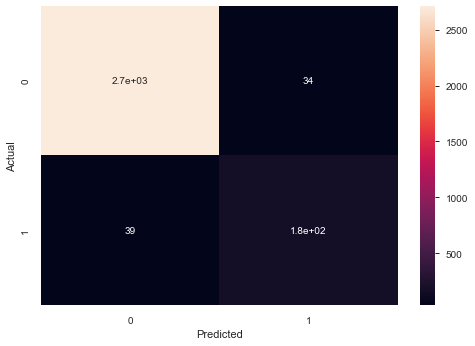

In [89]:
confusion_matrix = pd.crosstab(y_test, preds, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)

Text(0.5, 0, 'Relative Importance')

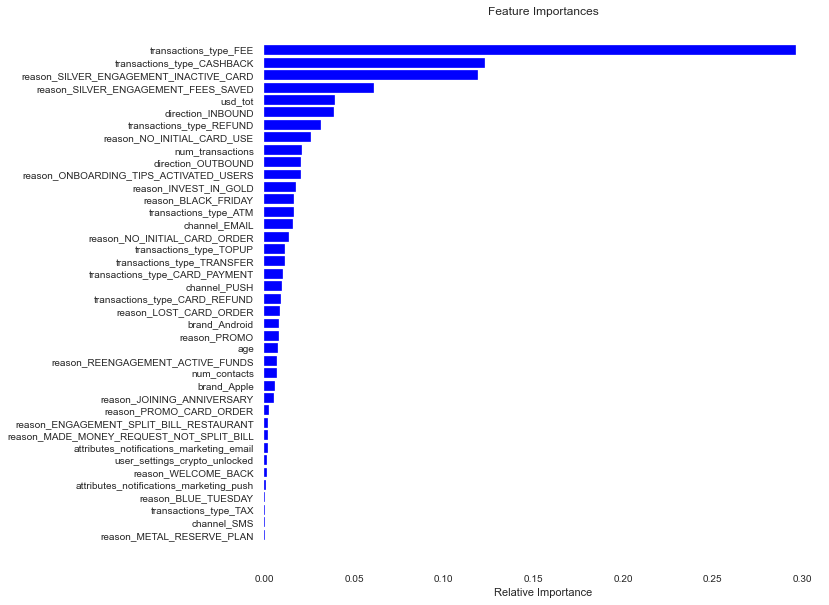

In [90]:
features = X.columns
importances = rf.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(10, 10))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance')

## Keep 'realistic' features and proceed to the actual prediction model

In [91]:
users4_df = users3_df.copy()

 users4_df.drop(['brand_Apple','brand_Android','reason_ENGAGEMENT_SPLIT_BILL_RESTAURANT',
                'reason_MADE_MONEY_REQUEST_NOT_SPLIT_BILL',
                 'reason_SILVER_ENGAGEMENT_FEES_SAVED','reason_SILVER_ENGAGEMENT_INACTIVE_CARD','transactions_type_TAX',
                 'channel_SMS','reason_METAL_RESERVE_PLAN', 'reason_BLUE_TUESDAY', 'attributes_notifications_marketing_push',
               'user_settings_crypto_unlocked', 'reason_WELCOME_BACK', 'attributes_notifications_marketing_email', 
                'reason_PROMO_CARD_ORDER', 'num_contacts', 'reason_JOINING_ANNIVERSARY'],axis=1, inplace=True)

In [93]:
X = users4_df.loc[:, users4_df.columns != 'plan']
#X = users4_df[feature_columns]
y = users4_df['plan']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_sample(X_train, y_train)
rf = RandomForestClassifier(max_depth=150,n_estimators=150, n_jobs=-1)
rf.fit(X_train_res, y_train_res)

print(rf.feature_importances_)

preds = rf.predict(X_test)

print(classification_report(y_test, rf.predict(X_test)))

[1.40694604e-03 1.15212425e-03 1.58117867e-03 6.52844755e-03
 7.24649977e-03 4.07755042e-02 1.82066287e-02 8.39638422e-03
 5.87424205e-03 1.34249248e-02 5.31774755e-04 2.80650984e-03
 1.64191665e-02 6.10222767e-03 1.05624607e-02 2.77683182e-03
 2.76350408e-04 1.24414297e-02 1.88714154e-02 1.51901945e-02
 8.37823919e-03 2.98818151e-03 8.21872313e-03 6.18265475e-02
 1.24777159e-01 1.22953037e-03 2.01686734e-02 8.49644098e-03
 3.86085684e-04 1.66285301e-02 9.65178558e-03 1.47454706e-02
 1.15551424e-01 2.98840911e-01 3.41459539e-02 4.91809472e-04
 1.21974651e-02 1.37000499e-02 3.64196960e-02 2.05860814e-02]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2743
           1       0.83      0.81      0.82       214

    accuracy                           0.97      2957
   macro avg       0.91      0.90      0.90      2957
weighted avg       0.97      0.97      0.97      2957



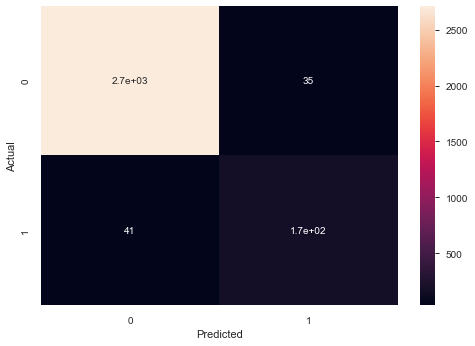

In [94]:
confusion_matrix = pd.crosstab(y_test, preds, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)

Text(0.5, 0, 'Relative Importance')

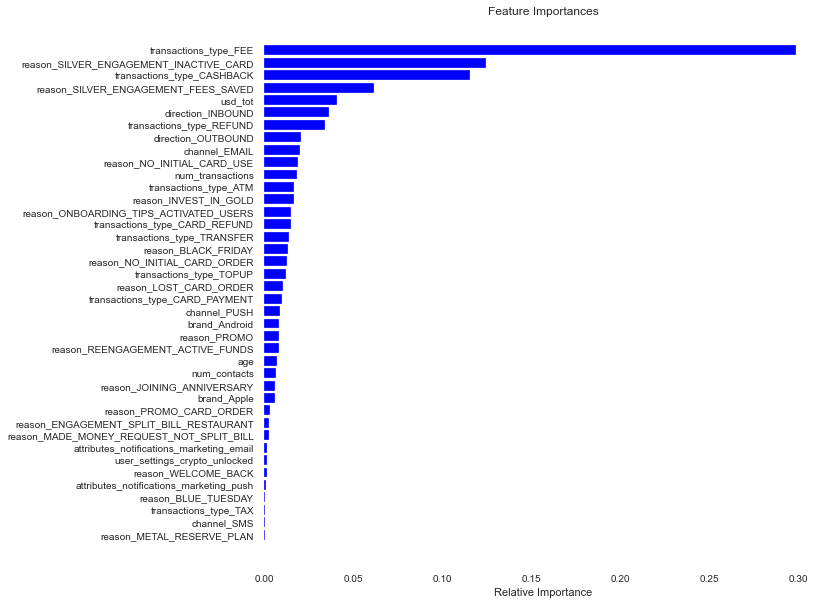

In [95]:
features = X.columns
importances = rf.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(10, 10))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance')

## NEW DATA

In [96]:
filenames = ['devices_test', 'notifications_test', 'transactions_test', 'users_test']

In [97]:
import pandas as pd
dataframes = [pd.read_csv('test/' + filename + '.csv') for filename in filenames]
devices_test_df, notifications_test_df, transactions_test_df, users_test_df = dataframes

In [98]:
profile = ProfileReport(notifications_test_df, minimal=True)
profile.to_widgets()

In [99]:
profile = ProfileReport(transactions_test_df, minimal=True)
profile.to_widgets()

In [100]:
profile = ProfileReport(users_test_df, minimal=True)
profile.to_widgets()

In [101]:
print(notifications_test_df['status'].unique())
print(notifications_test_df['channel'].unique())
print(notifications_test_df['reason'].unique())

['SENT' 'FAILED']
['PUSH' 'SMS' 'EMAIL']
['REENGAGEMENT_ACTIVE_FUNDS' 'BLUE_TUESDAY' 'NO_INITIAL_CARD_USE'
 'ENGAGEMENT_SPLIT_BILL_RESTAURANT' 'METAL_RESERVE_PLAN'
 'ONBOARDING_TIPS_ACTIVATED_USERS' 'MADE_MONEY_REQUEST_NOT_SPLIT_BILL'
 'NO_INITIAL_CARD_ORDER' 'PROMO' 'WELCOME_BACK' 'PROMO_CARD_ORDER'
 'LOST_CARD_ORDER' 'BLACK_FRIDAY' 'INVEST_IN_GOLD' 'JOINING_ANNIVERSARY']


In [102]:
print(transactions_test_df['transactions_type'].unique())
print(transactions_test_df['transactions_state'].unique())

['CARD_PAYMENT' 'EXCHANGE' 'TOPUP' 'ATM' 'TRANSFER' 'CARD_REFUND' 'REFUND'
 'TAX']
['COMPLETED' 'REVERTED' 'DECLINED' 'PENDING' 'FAILED' 'CANCELLED']


In [103]:
users_test_df = pd.merge(users_test_df, devices_test_df, on='user_id')

In [104]:
notifications_test_df = notifications_test_df[notifications_test_df['status'] == 'SENT'].copy()
notifications_test_df.drop(['status','created_date'],axis=1, inplace=True)
notifications_test_df = pd.get_dummies(notifications_test_df, columns=['reason','channel'])
notifications_test_df = notifications_test_df.groupby('user_id').sum()

In [105]:
users_test_df['age'] = 2020 - users_test_df['birth_year']
users_test_df.drop(['birth_year'],axis=1, inplace=True)
users_test_df.drop(['num_referrals','num_successful_referrals','city','created_date'],axis=1, inplace=True)

In [106]:
transactions_test_df = transactions_test_df[transactions_test_df['transactions_state'] == 'COMPLETED']
num_transactions_test = transactions_test_df.groupby('user_id')[['amount_usd']].count()
num_transactions_test.rename({'amount_usd': 'num_transactions'}, axis=1, inplace=True)
transactions_test_df =  transactions_test_df[transactions_test_df['transactions_type']!='EXCHANGE']
transactions_test_df.drop(['transaction_id','transactions_currency','transactions_state','ea_cardholderpresence','ea_merchant_mcc','ea_merchant_city','ea_merchant_country','created_date'],axis=1, inplace=True)

In [107]:
transactions_test_tot = transactions_test_df.groupby('user_id')[['amount_usd']].sum()
refunds_test_df = transactions_test_df[transactions_test_df['transactions_type']=='REFUND'].groupby('user_id')[['amount_usd']].sum()
refunds_test_df = refunds_test_df.rename(columns={'amount_usd':'refunds'})
card_refunds_test_df = transactions_test_df[transactions_test_df['transactions_type']=='CARD_REFUND'].groupby('user_id')[['amount_usd']].sum()
card_refunds_test_df = card_refunds_test_df.rename(columns={'amount_usd':'card_refunds'})

In [108]:
transactions_test_tot = transactions_test_tot.merge(refunds_test_df, right_index=True, left_index=True, how='outer')
transactions_test_tot = transactions_test_tot.merge(card_refunds_test_df, right_index=True, left_index=True, how='outer')
transactions_test_tot.fillna(0, inplace = True)
transactions_test_tot['usd_tot'] =transactions_test_tot['amount_usd']-transactions_test_tot['refunds']-transactions_test_tot['card_refunds']
transactions_test_df = pd.get_dummies(transactions_test_df, columns=['transactions_type','direction'])
transactions_test_df = transactions_test_df.groupby('user_id').sum()

In [109]:
transactions_test_df.drop(['amount_usd'],axis=1, inplace=True)

In [110]:
users_test_df = pd.merge(users_test_df, transactions_test_tot['usd_tot'], on='user_id', how = 'left')

In [111]:
users_test_df = pd.merge(users_test_df, num_transactions_test, on='user_id', how='left')

In [112]:
users_test_df.drop(['country'],axis=1, inplace=True)

In [113]:
users_test_df[['attributes_notifications_marketing_push','attributes_notifications_marketing_email']]=users_test_df[['attributes_notifications_marketing_push','attributes_notifications_marketing_email']].fillna(1) 

In [114]:
users_test_df[['usd_tot','num_transactions']]=users_test_df[['usd_tot','num_transactions']].fillna(0) 

In [115]:
users_test_df = pd.concat([users_test_df,pd.get_dummies(users_test_df['brand'], prefix='brand')],axis=1)
users_test_df.drop(['brand'],axis=1, inplace=True)
users_test_df = pd.merge(users_test_df, notifications_test_df, left_on='user_id',right_index = True, how='left')
users_test_df = pd.merge(users_test_df, transactions_test_df, left_on='user_id',right_index = True, how='left')
users_test_df.fillna(0, inplace = True)
users_test_df.drop(['user_id'],axis=1, inplace=True)

In [116]:
users_test_df.drop(['brand_Unknown'],axis=1, inplace=True)
users_test_df.drop(['reason_METAL_RESERVE_PLAN'],axis=1, inplace=True)
users_test_df.drop(['reason_BLUE_TUESDAY'],axis=1, inplace=True)
users_test_df.drop(['transactions_type_TAX'],axis=1, inplace=True)
users_test_df.drop(['channel_SMS'],axis=1, inplace=True)
users_test_df.drop(['reason_WELCOME_BACK'],axis=1, inplace=True)
users_test_df.drop(['attributes_notifications_marketing_push'],axis=1, inplace=True)
users_test_df.drop(['attributes_notifications_marketing_email'],axis=1, inplace=True)
users_test_df.drop(['user_settings_crypto_unlocked'],axis=1, inplace=True)

In [118]:
users_test_df.columns

Index(['num_contacts', 'age', 'usd_tot', 'num_transactions', 'brand_Android',
       'brand_Apple', 'reason_BLACK_FRIDAY',
       'reason_ENGAGEMENT_SPLIT_BILL_RESTAURANT', 'reason_INVEST_IN_GOLD',
       'reason_JOINING_ANNIVERSARY', 'reason_LOST_CARD_ORDER',
       'reason_MADE_MONEY_REQUEST_NOT_SPLIT_BILL',
       'reason_NO_INITIAL_CARD_ORDER', 'reason_NO_INITIAL_CARD_USE',
       'reason_ONBOARDING_TIPS_ACTIVATED_USERS', 'reason_PROMO',
       'reason_PROMO_CARD_ORDER', 'reason_REENGAGEMENT_ACTIVE_FUNDS',
       'channel_EMAIL', 'channel_PUSH', 'transactions_type_ATM',
       'transactions_type_CARD_PAYMENT', 'transactions_type_CARD_REFUND',
       'transactions_type_REFUND', 'transactions_type_TOPUP',
       'transactions_type_TRANSFER', 'direction_INBOUND',
       'direction_OUTBOUND'],
      dtype='object')

In [119]:
feature_columns = ['num_contacts','age','usd_tot','num_transactions','brand_Android','brand_Apple','reason_BLACK_FRIDAY','reason_INVEST_IN_GOLD','reason_JOINING_ANNIVERSARY','reason_LOST_CARD_ORDER','reason_MADE_MONEY_REQUEST_NOT_SPLIT_BILL','reason_NO_INITIAL_CARD_ORDER','reason_NO_INITIAL_CARD_USE','reason_ONBOARDING_TIPS_ACTIVATED_USERS','reason_PROMO','reason_PROMO_CARD_ORDER','reason_REENGAGEMENT_ACTIVE_FUNDS','channel_EMAIL','channel_PUSH','transactions_type_ATM','transactions_type_CARD_PAYMENT','transactions_type_CARD_REFUND','transactions_type_REFUND','transactions_type_TOPUP','reason_ENGAGEMENT_SPLIT_BILL_RESTAURANT','transactions_type_TRANSFER','direction_INBOUND','direction_OUTBOUND']#'attributes_notifications_marketing_push','reason_WELCOME_BACK','user_settings_crypto_unlocked','attributes_notifications_marketing_email','reason_METAL_RESERVE_PLAN','chanel_SMS','transactions_type_TAX','reason_BLUE_TUESDAY']

In [120]:
X = users4_df[feature_columns]
y = users4_df['plan']

sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_sample(X, y)
rf = RandomForestClassifier(max_depth=150,n_estimators=150, n_jobs=-1)
rf.fit(X_res, y_res)

print(rf.feature_importances_)

preds = rf.predict(users_test_df)

[0.01247986 0.01744032 0.08284501 0.04119035 0.02697714 0.02532752
 0.03805133 0.06381125 0.01209956 0.02375454 0.00851326 0.04772314
 0.06462032 0.04917561 0.02401464 0.01003374 0.02005872 0.05310198
 0.03581727 0.03865607 0.02382898 0.0235837  0.06367255 0.03349643
 0.00508722 0.02500719 0.0854127  0.04421959]


In [121]:
preds

array([0, 0, 0, ..., 0, 1, 0], dtype=int64)